## Diabetes Prediction.

In [2]:
from sklearn.datasets import load_diabetes

In [4]:
dataset = load_diabetes()

In [6]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
import pandas as pd
df_diabetes = pd.DataFrame(dataset.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's'])

In [10]:
## Independent and dependent features.
X = df_diabetes
y = dataset['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [14]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [16]:
## Correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

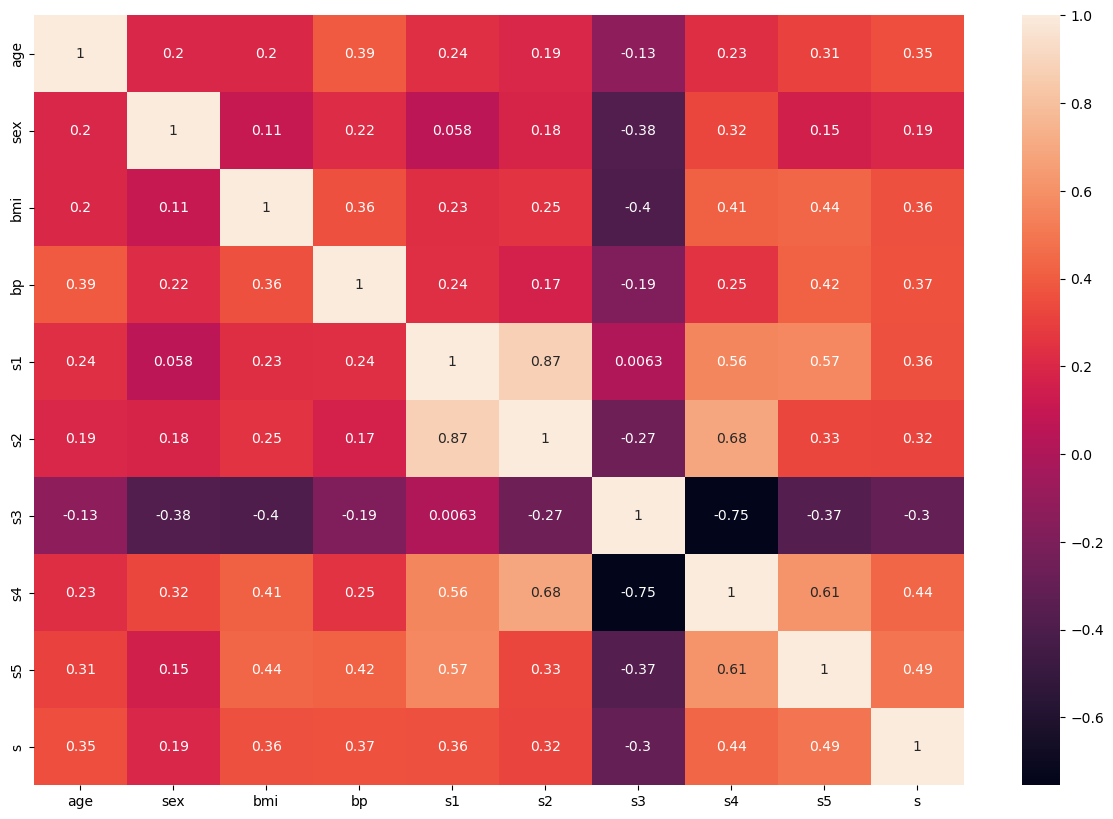

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning.

In [25]:
param = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,10,15,20,25],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
regressor1 = DecisionTreeRegressor()

In [35]:
grid = GridSearchCV(regressor1, param_grid=param, cv=5, scoring='neg_mean_squared_error')

In [37]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [39]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [43]:
## Prediction
y_pred = grid.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [47]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.33205046199388755
53.80977460444662
4226.564984580461


In [49]:
selected_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_features='sqrt', splitter='random')

In [51]:
selected_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='sqrt', splitter='random')

[Text(0.5386904761904762, 0.9166666666666666, 'x[7] <= 0.05\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.2916666666666667, 0.75, 'x[0] <= -0.09\nfriedman_mse = 5400.103\nsamples = 262\nvalue = 143.752'),
 Text(0.15476190476190477, 0.5833333333333334, 'x[8] <= -0.025\nfriedman_mse = 2422.222\nsamples = 9\nvalue = 121.667'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[2] <= -0.044\nfriedman_mse = 1998.98\nsamples = 7\nvalue = 107.857'),
 Text(0.047619047619047616, 0.25, 'x[4] <= -0.074\nfriedman_mse = 1060.222\nsamples = 3\nvalue = 91.333'),
 Text(0.023809523809523808, 0.08333333333333333, 'friedman_mse = 0.0\nsamples = 1\nvalue = 55.0'),
 Text(0.07142857142857142, 0.08333333333333333, 'friedman_mse = 600.25\nsamples = 2\nvalue = 109.5'),
 Text(0.14285714285714285, 0.25, 'x[3] <= -0.063\nfriedman_mse = 2344.688\nsamples = 4\nvalue = 120.25'),
 Text(0.11904761904761904, 0.08333333333333333, 'friedman_mse = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.16666666666

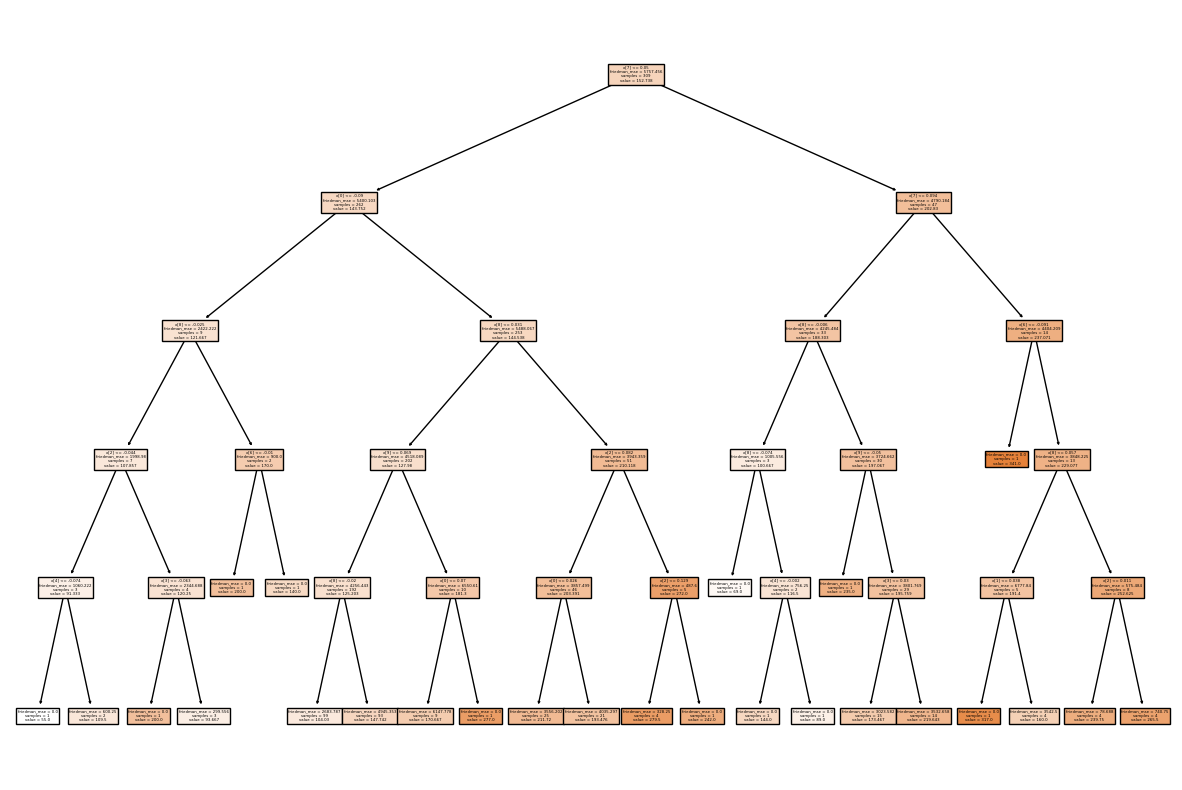

In [61]:
## Visualize Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selected_model, filled=True)